<h1><span style="color:#4188df">
STUDENT ACADEMIC DATA
</span></h1>
<h3><span style="color:#4188df">
<p>Exploratory Data Analysis and ML Algorithms Application
</span>
</h3>
<p>

<h3>
<p>Creating DataFrame
</h3>
<p>
The dataset in CSV format is first converted to a Spark DataFrame and then converted into a Pandas DataFrame. This process is necessary because Pandas can only read files in the local environment, whereas in Databricks, the tables are stored in a different location. On the other hand, Spark can read files from various locations, including the files stored in Databricks.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession


df = SparkSession.builder.getOrCreate().read.format('csv').load("dbfs:/FileStore//tables/Student_academic.csv", header=True, inferSchema=True).toPandas()


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int32  
 1   Application mode                                4424 non-null   int32  
 2   Application order                               4424 non-null   int32  
 3   Course                                          4424 non-null   int32  
 4   Daytime/evening attendance                      4424 non-null   int32  
 5   Previous qualification                          4424 non-null   int32  
 6   Nacionality                                     4424 non-null   int32  
 7   Mother's qualification                          4424 non-null   int32  
 8   Father's qualification                          4424 non-null   int32  
 9   Mother's occupation                      

In [0]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


<h3>
<p>Viewing the unique values of the columns.
</h3>
<p>

In [0]:
for c in df.columns:
    print("\n\n", c, "(", df[c].dtype, ")", ":", sorted(df[c].unique())[:min(len(df[c].unique()),50)])



 Marital status ( int32 ) : [1, 2, 3, 4, 5, 6]


 Application mode ( int32 ) : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


 Application order ( int32 ) : [0, 1, 2, 3, 4, 5, 6, 9]


 Course ( int32 ) : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


 Daytime/evening attendance ( int32 ) : [0, 1]


 Previous qualification ( int32 ) : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


 Nacionality ( int32 ) : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


 Mother's qualification ( int32 ) : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


 Father's qualification ( int32 ) : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


 Mother's occupation ( int32 ) : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32

<h3>
<p>Identify the columns with null values
</h3>

In [0]:
for i in df.columns:
    if not df[df[i].isna()].empty:
        print(i)
else:
    print("There is no columns including null values")

There is no columns including null values


<h3>
<p>Outlier Detection
</h3>

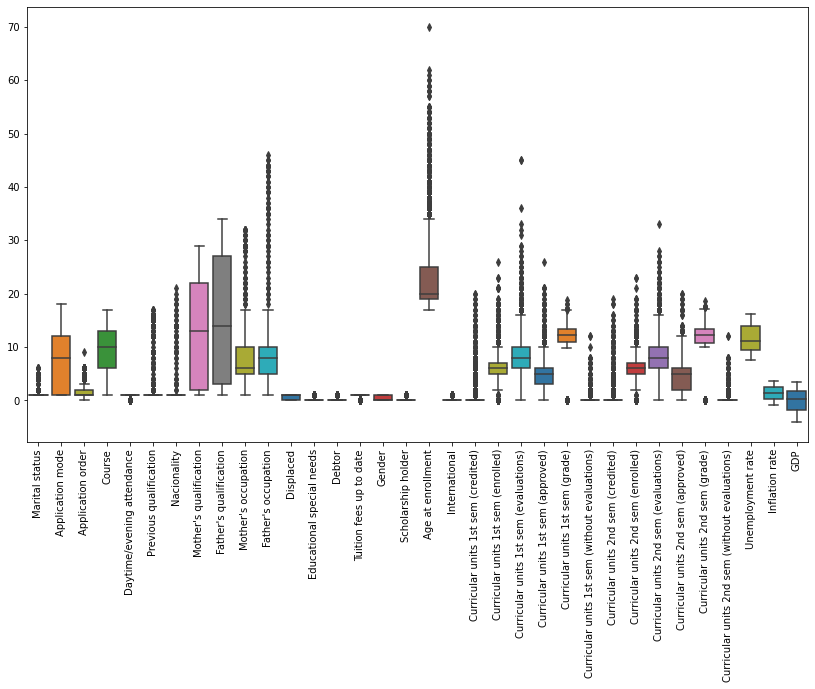

In [0]:
plt.figure(figsize=(14,8))
s = sns.boxplot(data=df, palette=sns.color_palette()[:2]+sns.color_palette()[-2:-1]+sns.color_palette()[2:])
plt.setp(s.get_xticklabels(), rotation=90)
plt.show()

In [0]:
targetpalette = [sns.color_palette()[index%10] for index in [sum([ord(c) for c in i]) for i in df.Target.unique()]]

<h3>
<p>Target Distribution
</h3>

In [0]:
fig = px.pie(df.groupby("Target").size().reset_index(name='Count'), values="Count", names="Target", width=420, height=420, color_discrete_sequence=px.colors.sequential.Plasma[::2])
fig.show()

<h3>
<p>Gender and Target Distribution
</h3>

In [0]:
df["strGender"] = df.loc[:, "Gender"].map({0 : 'male', 1: 'female'})
fig = px.sunburst(df.groupby(['Target', 'strGender']).size().reset_index(name='Count').sort_values(['strGender','Target']), path=['strGender',"Target"], values='Count', color_discrete_sequence=px.colors.sequential.Plasma[::4][:2], width=440, height=440)
fig.show()

In [0]:
df["intTarget"] = np.select([df.Target == 'Graduate', df.Target == 'Dropout'], [1,0])

<h3>
<p>HEAT MAP
</h3>

Out[12]: Text(0.5, 1.0, 'HEAT MAP')

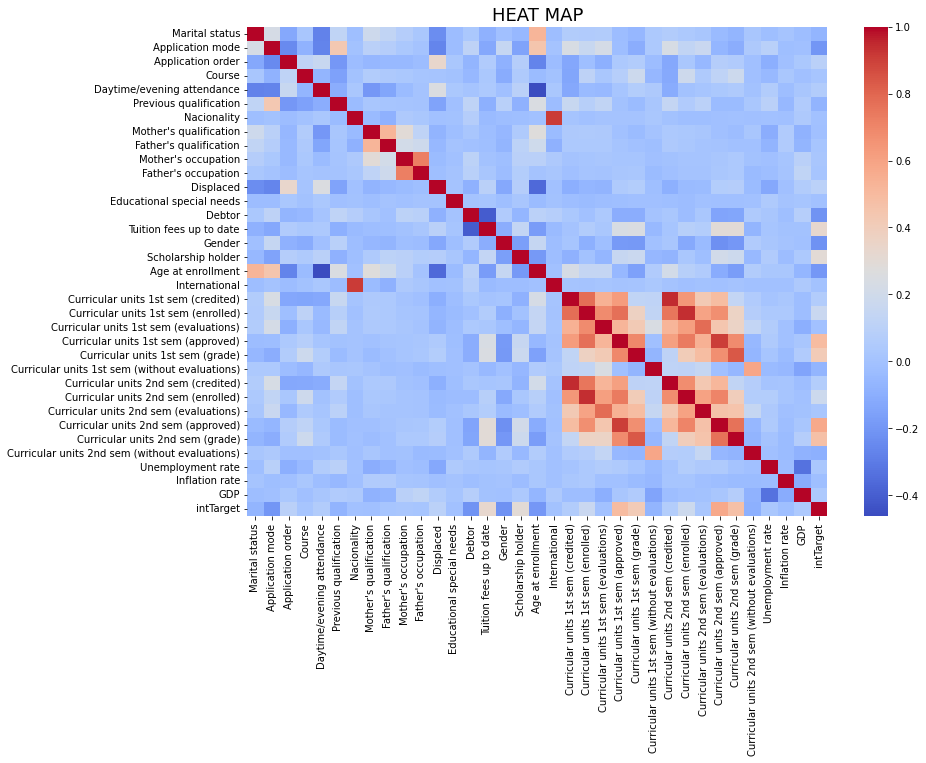

In [0]:
fig = plt.figure(figsize=(13,9))
g = sns.heatmap(df.corr(),cmap="coolwarm");
g.set_title('HEAT MAP', fontsize=18)

<h3>
<p>Highly Correlated Features
</h3>

In [0]:
corrs, features, HighlyCorrs = df.corr().values.tolist(), df.corr().columns, []
for r in range(len(features)):
    for c in range(r+1, len(features)):
        if round(abs(corrs[r][c]), 2) >= 0.3:
            HighlyCorrs.append((features[r], features[c], round(corrs[r][c], 3)))

HighlyCorrs.sort(key=lambda x:abs(x[2]), reverse = True)    

corr = pd.DataFrame(HighlyCorrs, columns=["Feature 1", "Feature 2", "R Value"])
display(corr)

Feature 1,Feature 2,R Value
Curricular units 1st sem (credited),Curricular units 2nd sem (credited),0.945
Curricular units 1st sem (enrolled),Curricular units 2nd sem (enrolled),0.943
Nacionality,International,0.912
Curricular units 1st sem (approved),Curricular units 2nd sem (approved),0.904
Curricular units 1st sem (grade),Curricular units 2nd sem (grade),0.837
Curricular units 1st sem (evaluations),Curricular units 2nd sem (evaluations),0.779
Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),0.774
Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),0.769
Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),0.761
Curricular units 1st sem (enrolled),Curricular units 2nd sem (credited),0.754


<h3>
<p>The Features Highly Correlated with The Target
</h3>

In [0]:
corr[corr["Feature 2"] == "intTarget" ]

,Feature 1,Feature 2,R Value
26,Curricular units 2nd sem (approved),intTarget,0.577
34,Curricular units 1st sem (approved),intTarget,0.492
37,Curricular units 2nd sem (grade),intTarget,0.473
47,Curricular units 1st sem (grade),intTarget,0.413
57,Tuition fees up to date,intTarget,0.327
58,Scholarship holder,intTarget,0.299


In [0]:
sns.set_style('darkgrid')

<h3>
<p>Average Approved Courses Distribution Across Semesters by Target
</h3>

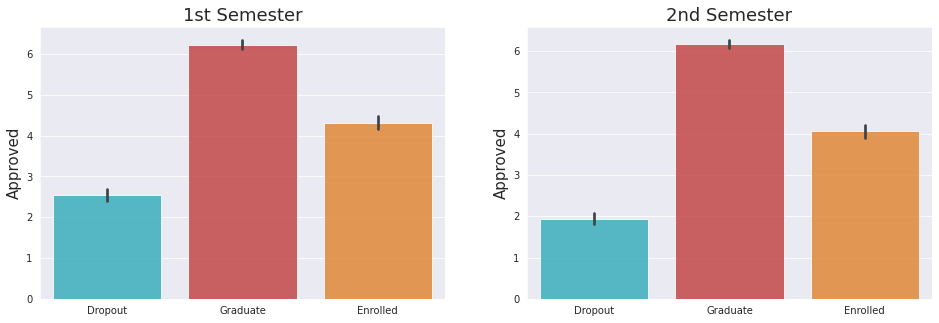

In [0]:
fig,axs=plt.subplots(1,2, figsize=(16, 5))
fig.suptitle("", fontsize=28)
sems=["1st", "2nd"]
for i, sem in enumerate(["Curricular units 1st sem (approved)", "Curricular units 2nd sem (approved)"]):
    ax = sns.barplot(data=df, x="Target", y=sem, alpha=.8, ax=axs[i], palette=targetpalette)
    ax.set_xlabel('', fontsize=15)
    ax.set_ylabel("Approved", fontsize=15)
    ax.set_title(sems[i]+" Semester", fontsize=18)
fig.show()

<h3>
<p>Average Grade Distribution Across Semesters by Target
</h3>

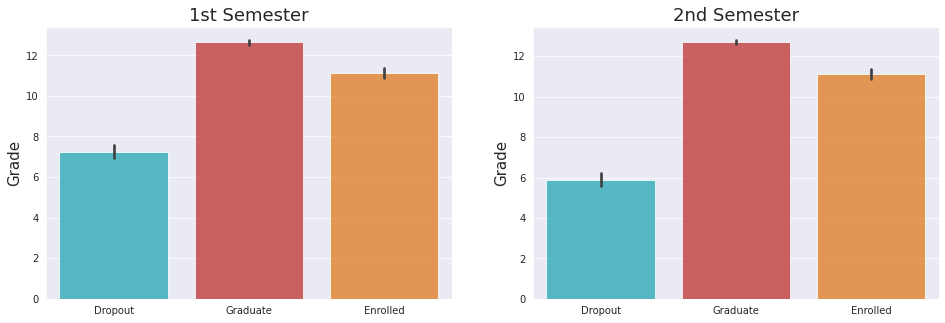

In [0]:
fig,axs=plt.subplots(1,2, figsize=(16, 5))
fig.suptitle("", fontsize=28)
sems=["1st", "2nd"]
for i, sem in enumerate(["Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)"]):
    ax = sns.barplot(data=df, x="Target", y=sem, alpha=.8, ax=axs[i], palette=targetpalette)
    ax.set_xlabel('', fontsize=15)
    ax.set_ylabel("Grade", fontsize=15)
    ax.set_title(sems[i]+" Semester", fontsize=18)
fig.show()

<h3>
<p>Correlation of Mothers' and Fathers' Occupations Across Targets
</h3>

Out[18]: <seaborn.axisgrid.FacetGrid at 0x7f1498a1ff70>

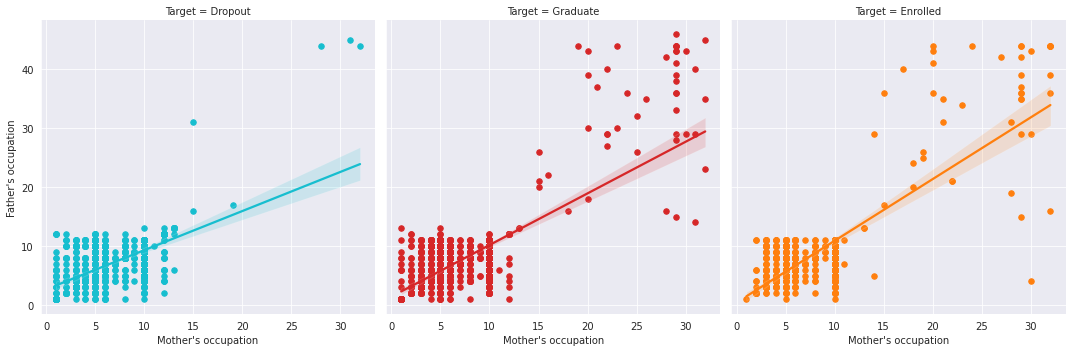

In [0]:
sns.lmplot(data=df, x="Mother's occupation",y="Father's occupation",col="Target",hue="Target", scatter_kws={"s": 30, "alpha": 1}, palette=targetpalette)

<h3>
<p>Correlation of Mother's Occupation, Father's Occupation, and 2nd Semester Grade
</h3>

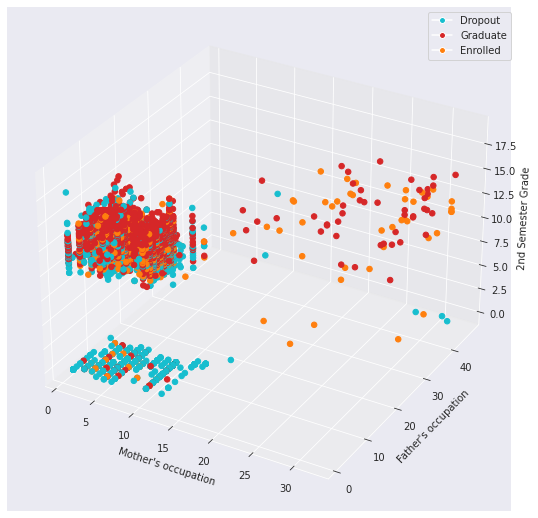

In [0]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(df["Mother's occupation"], df["Father's occupation"], df["Curricular units 1st sem (grade)"], s=30, c=[sns.color_palette()[index%10] for index in [sum([ord(c) for c in i]) for i in df.Target]], marker='o', alpha=1, label=df.Target.unique())
ax.set_xlabel("Mother's Occupation")
ax.set_ylabel("Father's Occupation")
ax.set_zlabel("Grade in 2nd Semester")

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=target, markerfacecolor=color) 
                   for target, color in zip(df.Target.unique(), targetpalette)]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.01, 1))
plt.show()

<h3>
<p>Correlation of Second Semester Approved Course Number, Second Semester Grade, and Scholarship
</h3>

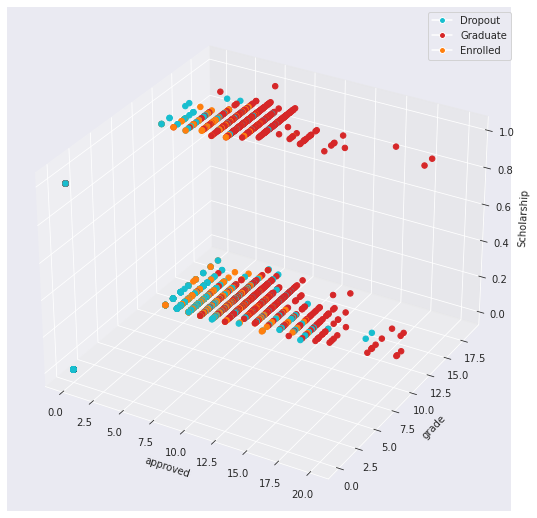

In [0]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(df["Curricular units 2nd sem (approved)"], df["Curricular units 2nd sem (grade)"], df["Scholarship holder"], s=30, c=[sns.color_palette()[index%10] for index in [sum([ord(c) for c in i]) for i in df.Target]], marker='o', alpha=1, label=df.Target.unique())
ax.set_xlabel("Number of Approved Courses in 2nd Semester")
ax.set_ylabel("Grade in 2nd Semester")
ax.set_zlabel("Scholarship")

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=target, markerfacecolor=color) 
                   for target, color in zip(df.Target.unique(), targetpalette)]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.01, 1))
plt.show()

d
<h3>
<p>Trimming Outliers
</h3>

In [0]:
Q1, Q3 = df.quantile(0.25), df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

Out[21]: (948, 37)

In [0]:
    EnrolledStudents = df[df.Target == "Enrolled"].reset_index(drop=True)
    DF = df.drop(df[df.Target == "Enrolled"].index).reset_index(drop=True)

In [0]:
fig = px.pie(DF.groupby("Target").size().reset_index(name='Count'), values="Count", names="Target", width=420, height=420, color_discrete_sequence=px.colors.sequential.Plasma[::3])
fig.show()

<h3>
<p>Dividing The Dataframe as Features and Label
</h3>
<p>
The DataFrames are divided into their corresponding features and label values.

In [0]:
features, label = DF.iloc[:, :-3],  DF.loc[:, "intTarget"]

<h3>
<p>Separating Features and Labels into Their Respective Train and Test datasets.
</h3>
<p>

In [0]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, y_Train, y_Test = train_test_split(features, label, stratify=label, test_size=0.20, random_state=0)

<h3>
<p>Cumulative Variance over PCA Component Number
</h3>
<p>I created the chart below to illustrate how to specify the number of components in PCA based on a certain cumulative variance range. In the example, the range is from 0.9 to 1, and the lowest number of components whose variance is 1 is also included. Other components will not be added to this study, as their inclusion will not alter the result.

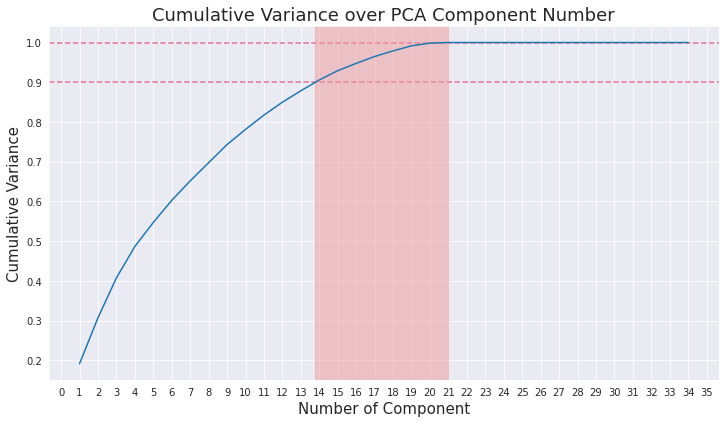

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

pca = PCA()
pca.fit(StandardScaler().fit_transform(features))
CumulativeVariance = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=(12,6.5))
g = sns.lineplot(x=range(1, len(CumulativeVariance) + 1), y=CumulativeVariance)
g.xaxis.set_major_locator(ticker.MultipleLocator(1))

minVarianceLin = plt.axhline(y=0.9, color='#e17191', ls="--", zorder=1)
maxVarianceLine = plt.axhline(y=1, color='#e17191', ls="--", zorder=1)

bmin, amin = CumulativeVariance[CumulativeVariance<0.9].max(), CumulativeVariance[CumulativeVariance>0.9].min()
cmin = np.where(CumulativeVariance == bmin)[0][0] + 1 + (0.9-bmin)/(amin-bmin)
cmax = min(34, (35 - len([i for i in CumulativeVariance.tolist() if i == 1])))
g.axvspan(cmin, cmax, color='#EF9A9A', alpha=0.5)

g.set_xlabel("Number of Component", fontsize=15)
g.set_ylabel("Cumulative Variance", fontsize=15)
g.set_title('Cumulative Variance over PCA Component Number', fontsize=18)

fig.show()

<h2>
<p>ML Algorithms
</h2>

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, make_scorer


<h3>
<p>Threshold for Difference between Train and Test Scores (Both for Training Phase and Test Phase)
</h3>

In [0]:
T = 0.003

<h3>
<p>Refit Strategy for Grid Search
</h3>

In [0]:
from math import log10, ceil

def special_refit(cv_results):
    threshold=T
    AbsDiffTrainValid = abs(cv_results["mean_test_score"] - cv_results["mean_train_score"])
    cv = pd.DataFrame(cv_results)
    cv['Abs Diff Train-Validation'] = abs(cv_results["mean_test_score"] - cv_results["mean_train_score"])

    #print(cv.to_dict())

    while cv[cv["Abs Diff Train-Validation"] < threshold].empty: # (treshold: 0.001 -> 0.002 ... - > 0.009 -> 0.01 -> 0.02 ... )
        threshold += 10**((-1)*ceil(log10(threshold)*(-1)))
        threshold = round(threshold, ceil(log10(threshold)*(-1)))

    return cv[cv["Abs Diff Train-Validation"] < threshold].sort_values(["mean_test_score", "Abs Diff Train-Validation"], ascending=[False, True]).index[0]

<h3>
<p>ApplyMLModels Function
</h3>
<p>

In [0]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, make_scorer


def ApplyMLModels(model, parameters, min_cum_variance_for_pca):
    results = []
    scalers = {"Standard": StandardScaler(), "MinMax": MinMaxScaler(), "Robust": RobustScaler()}
    for s in scalers:
        print("\n\n", s, "Scaler \n")
        scaler = scalers[s]
        scaledX = scaler.fit_transform(X_Train)

        pca = PCA()
        pca.fit(scaledX) 

        CumulativeVariance = np.cumsum(pca.explained_variance_ratio_)
        variances = list(np.unique(CumulativeVariance[CumulativeVariance >= min_cum_variance_for_pca]))
        bIndex = np.where(CumulativeVariance >= min_cum_variance_for_pca)[0][0]
        ComponentNumbers = [bIndex+1+variances.index(i) for i in variances]
        for num in ComponentNumbers:
            pca = PCA(n_components=num)
            pcadX = pca.fit_transform(scaledX)

            grid_search = GridSearchCV(model,
                                       parameters,
                                       scoring=make_scorer(f1_score),
                                       cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0),
                                       return_train_score=True,
                                       refit=special_refit,
                                       n_jobs=-1).fit(pcadX, y_Train)
        
            cvResults, index = grid_search.cv_results_, grid_search.best_index_
            AbsDiffTrainValid = abs(cvResults["mean_test_score"][index] - cvResults["mean_train_score"][index])

            if len(results) == 0:
                results.append(['scaler', 'cumulative variance', 'pca_n_components'] + 
                               list(grid_search.best_params_) + 
                               ['Mean Validation F1-Score', 'Mean Train F1-Score', 
                                'Abs Diff Train-Validation', 'Scaler Object', 'PCA', 'Grid_Search'])
            
            results.append([s, CumulativeVariance.tolist()[num-1], num] + 
                           list(grid_search.best_params_.values()) + 
                           [cvResults["mean_test_score"][index], cvResults['mean_train_score'][index], 
                            AbsDiffTrainValid, scaler, pca, grid_search])
            
            print(results[-1][:-3])
    
    return pd.DataFrame(results[1:], columns=results[0])

<h3>
<p>Logistic Regression
</h3>

In [0]:
from sklearn.linear_model import LogisticRegression 

Logistic_Regression_Results_DF = ApplyMLModels(model = LogisticRegression(random_state=0, max_iter=10000),
                                               parameters = {'penalty' : ['l1', 'l2'], 
                                                             'C' : np.logspace(-4, 4, 20),
                                                             'solver' : ['liblinear', 'saga']},
                                               min_cum_variance_for_pca = 0.9)



 Standard Scaler 

['Standard', 0.9062055325570857, 14, 0.03359818286283781, 'l1', 'saga', 0.9339680547162065, 0.9326608487502341, 0.0013072059659723356]
['Standard', 0.9291054255381894, 15, 0.012742749857031334, 'l2', 'saga', 0.9367469923635952, 0.9396768304174608, 0.0029298380538655966]
['Standard', 0.9483211683140681, 16, 0.012742749857031334, 'l2', 'saga', 0.9376646007862742, 0.9394148203377789, 0.0017502195515046726]
['Standard', 0.9662028923816108, 17, 0.012742749857031334, 'l2', 'saga', 0.9396557754790689, 0.9394705306497368, 0.0001852448293320208]
['Standard', 0.9795925289683047, 18, 0.012742749857031334, 'l2', 'saga', 0.9407197624747834, 0.9399695058908957, 0.0007502565838877207]
['Standard', 0.9922143862170674, 19, 0.08858667904100823, 'l1', 'saga', 0.9438688505908855, 0.9443327080882655, 0.0004638574973799825]
['Standard', 0.9986408568183742, 20, 0.08858667904100823, 'l1', 'saga', 0.9438688505908855, 0.9443327080882655, 0.0004638574973799825]
['Standard', 1.0, 21, 0.088586

In [0]:
Logistic_Regression_Results_DF.describe()

,cumulative variance,pca_n_components,C,Mean Validation F1-Score,Mean Train F1-Score,Abs Diff Train-Validation
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.966651,16.962963,0.126976,0.940983,0.942212,0.001529
std,0.030937,2.695887,0.087590,0.005974,0.005977,0.001012
min,0.906206,12.000000,0.012743,0.929581,0.930319,0.000171
25%,0.946432,15.000000,0.088587,0.937665,0.939490,0.000548
50%,0.973777,17.000000,0.088587,0.939657,0.941602,0.001307
75%,0.994037,19.000000,0.233572,0.945710,0.945162,0.002632
max,1.000000,21.000000,0.233572,0.949489,0.950776,0.002930


In [0]:
BestOnes = Logistic_Regression_Results_DF[Logistic_Regression_Results_DF["Abs Diff Train-Validation"] < T].sort_values(["Mean Validation F1-Score", "Abs Diff Train-Validation", "pca_n_components"], ascending=[False, True, True])
BestOnes.iloc[:, :-3]

,scaler,cumulative variance,pca_n_components,C,penalty,solver,Mean Validation F1-Score,Mean Train F1-Score,Abs Diff Train-Validation
18,Robust,0.914505,13,0.088587,l2,saga,0.949489,0.949809,0.000321
22,Robust,0.970013,17,0.088587,l2,saga,0.949408,0.950537,0.001129
21,Robust,0.958025,16,0.088587,l2,saga,0.948553,0.950776,0.002223
19,Robust,0.930671,14,0.088587,l2,saga,0.948435,0.950271,0.001837
20,Robust,0.945264,15,0.088587,l2,saga,0.948435,0.950536,0.002102
24,Robust,0.991826,19,0.033598,l2,saga,0.946763,0.949599,0.002836
23,Robust,0.981263,18,0.088587,l1,saga,0.945710,0.945162,0.000548
25,Robust,0.998096,20,0.088587,l1,saga,0.945710,0.945162,0.000548
26,Robust,1.000000,21,0.088587,l1,saga,0.945710,0.945162,0.000548
5,Standard,0.992214,19,0.088587,l1,saga,0.943869,0.944333,0.000464


In [0]:
TheBestOneForLR = BestOnes.iloc[0] 
pd.DataFrame(TheBestOneForLR.tolist(), index=TheBestOneForLR.keys(), columns=['Logistic Regression']).iloc[:-3]

,Logistic Regression
scaler,Robust
cumulative variance,0.914505
pca_n_components,13
C,0.088587
penalty,l2
solver,saga
Mean Validation F1-Score,0.949489
Mean Train F1-Score,0.949809
Abs Diff Train-Validation,0.000321


<h3>
<p>SVC
</h3>

In [0]:
from sklearn.svm import SVC

SVC_Results_DF = ApplyMLModels(model = SVC(random_state=0, probability=True), 
                               parameters = {'C': [1, 10, 100], 
                                             'gamma': [0.1, 0.01, 0.001], 
                                             'kernel': ['linear', 'sigmoid']},
                               min_cum_variance_for_pca = 0.9)



 Standard Scaler 

['Standard', 0.9062055325570857, 14, 100, 0.01, 'sigmoid', 0.9205266713708777, 0.9218164476400679, 0.0012897762691901349]
['Standard', 0.9291054255381894, 15, 1, 0.001, 'sigmoid', 0.9034061053554929, 0.9034089027024235, 2.79734693053868e-06]
['Standard', 0.9483211683140681, 16, 1, 0.001, 'sigmoid', 0.9034061053554929, 0.9034089027024235, 2.79734693053868e-06]
['Standard', 0.9662028923816108, 17, 1, 0.001, 'sigmoid', 0.9034061053554929, 0.9034089027024235, 2.79734693053868e-06]
['Standard', 0.9795925289683047, 18, 1, 0.001, 'sigmoid', 0.9034061053554929, 0.9034089027024235, 2.79734693053868e-06]
['Standard', 0.9922143862170674, 19, 100, 0.01, 'sigmoid', 0.934740048299795, 0.9319469272327486, 0.0027931210670463225]
['Standard', 0.9986408568183742, 20, 1, 0.001, 'sigmoid', 0.9034061053554929, 0.9034089027024235, 2.79734693053868e-06]
['Standard', 1.0, 21, 100, 0.01, 'sigmoid', 0.9336398868702801, 0.931625415835088, 0.0020144710351921447]


 MinMax Scaler 

['MinMax', 

In [0]:
SVC_Results_DF.describe()

,cumulative variance,pca_n_components,C,gamma,Mean Validation F1-Score,Mean Train F1-Score,Abs Diff Train-Validation
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.966651,16.962963,31.000000,0.019667,0.919154,0.919668,0.000875
std,0.030937,2.695887,45.687063,0.034400,0.018748,0.019490,0.001154
min,0.906206,12.000000,1.000000,0.001000,0.903406,0.903409,0.000003
25%,0.946432,15.000000,1.000000,0.001000,0.903406,0.903409,0.000003
50%,0.973777,17.000000,1.000000,0.010000,0.903406,0.903409,0.000003
75%,0.994037,19.000000,100.000000,0.010000,0.937263,0.937588,0.002151
max,1.000000,21.000000,100.000000,0.100000,0.949522,0.951928,0.002793


In [0]:
TheBestOneForSVC = SVC_Results_DF[SVC_Results_DF["Abs Diff Train-Validation"] < T].sort_values(["Mean Validation F1-Score", "Abs Diff Train-Validation", "pca_n_components"], ascending=[False, True, True]).iloc[0] 
pd.DataFrame(TheBestOneForSVC.tolist(), index=TheBestOneForSVC.keys(), columns=['Support Vector Classifier']).iloc[:-3]

,Support Vector Classifier
scaler,Robust
cumulative variance,0.958025
pca_n_components,16
C,100
gamma,0.001
kernel,sigmoid
Mean Validation F1-Score,0.949522
Mean Train F1-Score,0.951928
Abs Diff Train-Validation,0.002406


<h3>
<p>GaussianNB
</h3>

In [0]:
from sklearn.naive_bayes import GaussianNB

GaussianNB_Results_DF = ApplyMLModels(model = GaussianNB(),
                                      parameters = {'var_smoothing': np.logspace(0,-9, num=100)},
                                      min_cum_variance_for_pca = 0.9)



 Standard Scaler 

['Standard', 0.9062055325570857, 14, 0.15199110829529336, 0.9390740768519213, 0.9417398214988817, 0.002665744646960344]
['Standard', 0.9291054255381894, 15, 0.2848035868435802, 0.9339871843749694, 0.9361374464634691, 0.002150262088499666]
['Standard', 0.9483211683140681, 16, 0.43287612810830584, 0.9288041551614498, 0.9295734293905811, 0.0007692742291313115]
['Standard', 0.9662028923816108, 17, 0.43287612810830584, 0.9278865467387705, 0.9300596757830032, 0.0021731290442327245]
['Standard', 0.9795925289683047, 18, 0.43287612810830584, 0.9289564490887295, 0.9302905063912768, 0.0013340573025472091]
['Standard', 0.9922143862170674, 19, 0.3511191734215131, 0.930622710577464, 0.9325260111028635, 0.0019033005253994428]
['Standard', 0.9986408568183742, 20, 0.3511191734215131, 0.930622710577464, 0.9325611815957204, 0.0019384710182563936]
['Standard', 1.0, 21, 0.3511191734215131, 0.929730848816037, 0.9325611815957204, 0.0028303327796834754]


 MinMax Scaler 

['MinMax', 0.907

In [0]:
GaussianNB_Results_DF.describe()

,cumulative variance,pca_n_components,var_smoothing,Mean Validation F1-Score,Mean Train F1-Score,Abs Diff Train-Validation
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.966651,16.962963,0.204133,0.932471,0.934046,0.001779
std,0.030937,2.695887,0.144607,0.005862,0.005486,0.000816
min,0.906206,12.000000,0.002310,0.921756,0.924430,0.000459
25%,0.946432,15.000000,0.031796,0.927508,0.929820,0.001194
50%,0.973777,17.000000,0.231013,0.930623,0.932561,0.001903
75%,0.994037,19.000000,0.317961,0.938472,0.939440,0.002670
max,1.000000,21.000000,0.432876,0.940408,0.941740,0.002997


In [0]:
TheBestOneForGNB = GaussianNB_Results_DF[GaussianNB_Results_DF["Abs Diff Train-Validation"] < T].sort_values(["Mean Validation F1-Score", "Abs Diff Train-Validation", "pca_n_components"], ascending=[False, True, True]).iloc[0] 
pd.DataFrame(TheBestOneForGNB.tolist(), index=TheBestOneForGNB.keys(), columns=['Gaussian Naive Bayes']).iloc[:-3]

,Gaussian Naive Bayes
scaler,Robust
cumulative variance,0.930671
pca_n_components,14
var_smoothing,0.02848
Mean Validation F1-Score,0.940408
Mean Train F1-Score,0.939886
Abs Diff Train-Validation,0.000522


<h3>
<p>K-Nearest Neighbors
</h3>

In [0]:
from sklearn.neighbors import KNeighborsClassifier

kNN_Results_DF = ApplyMLModels(model = KNeighborsClassifier(),
                               parameters = {'n_neighbors': range(1, 31, 2)},
                               min_cum_variance_for_pca = 0.90)



 Standard Scaler 

['Standard', 0.9062055325570857, 14, 15, 0.938630314548428, 0.9404162337947992, 0.0017859192463711704]
['Standard', 0.9291054255381894, 15, 25, 0.9331085003701342, 0.935472201256515, 0.002363700886380826]
['Standard', 0.9483211683140681, 16, 19, 0.9367500885078581, 0.938939138879336, 0.002189050371477874]
['Standard', 0.9662028923816108, 17, 19, 0.9376854118909428, 0.9394116690471306, 0.0017262571561877937]
['Standard', 0.9795925289683047, 18, 9, 0.9403934085048824, 0.9423884364622761, 0.0019950279573937024]
['Standard', 0.9922143862170674, 19, 9, 0.9403934085048824, 0.9433611815442845, 0.0029677730394020996]
['Standard', 0.9986408568183742, 20, 17, 0.9377944691020825, 0.940072670282224, 0.002278201180141437]
['Standard', 1.0, 21, 17, 0.9368775301175438, 0.940072670282224, 0.0031951401646801436]


 MinMax Scaler 

['MinMax', 0.9077638236947351, 12, 21, 0.9180307625571006, 0.9184403922604407, 0.0004096297033401308]
['MinMax', 0.9298054135330008, 13, 15, 0.9205541782

In [0]:
kNN_Results_DF.describe()

,cumulative variance,pca_n_components,n_neighbors,Mean Validation F1-Score,Mean Train F1-Score,Abs Diff Train-Validation
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.966651,16.962963,17.962963,0.934902,0.936182,0.001403
std,0.030937,2.695887,5.034355,0.011536,0.012026,0.000976
min,0.906206,12.000000,9.000000,0.915382,0.915833,0.000171
25%,0.946432,15.000000,15.000000,0.923564,0.923902,0.000441
50%,0.973777,17.000000,17.000000,0.937685,0.940073,0.001645
75%,0.994037,19.000000,22.000000,0.946661,0.947652,0.002234
max,1.000000,21.000000,27.000000,0.948165,0.950482,0.003195


In [0]:
TheBestOneForKNN = kNN_Results_DF[kNN_Results_DF["Abs Diff Train-Validation"] < T].sort_values(["Mean Validation F1-Score", "Abs Diff Train-Validation", "pca_n_components"], ascending=[False, True, True]).iloc[0] 
pd.DataFrame(TheBestOneForKNN.tolist(), index=TheBestOneForKNN.keys(), columns=['K-Nearest Neighbors Classifier']).iloc[:-3]

,K-Nearest Neighbors Classifier
scaler,Robust
cumulative variance,0.998096
pca_n_components,20
n_neighbors,23
Mean Validation F1-Score,0.948165
Mean Train F1-Score,0.947662
Abs Diff Train-Validation,0.000504


<h3>
<p>Decision Tree
</h3>

In [0]:
from sklearn.tree import DecisionTreeClassifier

Decision_Tree_Results_DF = ApplyMLModels(model = DecisionTreeClassifier(random_state=0), 
                                         parameters = {'criterion': ['gini', 'entropy'], 
                                                       'max_depth': [None] + list(range(1,7)), 
                                                       'min_samples_leaf': range(1,10),
                                                       'min_samples_split': [2]},
                                         min_cum_variance_for_pca = 0.99)



 Standard Scaler 

['Standard', 0.9922143862170674, 19, 'entropy', 1, 1, 2, 0.9146096224808679, 0.9143168565418561, 0.00029276593901172987]
['Standard', 0.9986408568183742, 20, 'entropy', 1, 1, 2, 0.9146096224808679, 0.9143168565418561, 0.00029276593901172987]
['Standard', 1.0, 21, 'entropy', 1, 1, 2, 0.9146096224808679, 0.9143168565418561, 0.00029276593901172987]


 MinMax Scaler 

['MinMax', 0.9958603544056787, 19, 'entropy', 1, 1, 2, 0.9032264108361756, 0.9059903654734598, 0.0027639546372841828]
['MinMax', 0.998953436620224, 20, 'entropy', 1, 1, 2, 0.9032264108361756, 0.9059903654734598, 0.0027639546372841828]
['MinMax', 1.0, 21, 'entropy', 1, 1, 2, 0.9032264108361756, 0.9059903654734598, 0.0027639546372841828]


 Robust Scaler 

['Robust', 0.9918257137033688, 19, 'gini', 1, 1, 2, 0.9371836381568223, 0.9396727717746309, 0.00248913361780867]
['Robust', 0.9980960911449319, 20, 'gini', 1, 1, 2, 0.9371836381568223, 0.9396727717746309, 0.00248913361780867]
['Robust', 0.9999999999999998

In [0]:
Decision_Tree_Results_DF.describe()

,cumulative variance,pca_n_components,max_depth,min_samples_leaf,min_samples_split,Mean Validation F1-Score,Mean Train F1-Score,Abs Diff Train-Validation
count,9.000000,9.000000,9.0,9.0,9.0,9.000000,9.000000,9.000000
mean,0.997288,20.000000,1.0,1.0,2.0,0.918340,0.919993,0.001849
std,0.003258,0.866025,0.0,0.0,0.0,0.014968,0.015194,0.001173
min,0.991826,19.000000,1.0,1.0,2.0,0.903226,0.905990,0.000293
25%,0.995860,19.000000,1.0,1.0,2.0,0.903226,0.905990,0.000293
50%,0.998641,20.000000,1.0,1.0,2.0,0.914610,0.914317,0.002489
75%,1.000000,21.000000,1.0,1.0,2.0,0.937184,0.939673,0.002764
max,1.000000,21.000000,1.0,1.0,2.0,0.937184,0.939673,0.002764


In [0]:
TheBestOneForDT = Decision_Tree_Results_DF[Decision_Tree_Results_DF["Abs Diff Train-Validation"] < T].sort_values(["Mean Validation F1-Score", "Abs Diff Train-Validation", "pca_n_components"], ascending=[False, True, True]).iloc[0] 
pd.DataFrame(TheBestOneForDT.tolist(), index=TheBestOneForDT.keys(), columns=['Decision Tree']).iloc[:-3]

,Decision Tree
scaler,Robust
cumulative variance,0.991826
pca_n_components,19
criterion,gini
max_depth,1
min_samples_leaf,1
min_samples_split,2
Mean Validation F1-Score,0.937184
Mean Train F1-Score,0.939673
Abs Diff Train-Validation,0.002489


<h3>
<p>Random Forest
</h3>

In [0]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest_Results_DF = ApplyMLModels(model = RandomForestClassifier(random_state=0), 
                                         parameters = {'criterion' :['gini', 'entropy'],  
                                                       'max_depth' : [None] + list(range(8,13)), 
                                                       'min_samples_leaf': range(1,5),
                                                       'min_samples_split': [2],
                                                       'n_estimators': [20, 50]},
                                         min_cum_variance_for_pca = 0.99)



 Standard Scaler 

['Standard', 0.9922143862170674, 19, 'gini', 11, 4, 2, 50, 0.9422935059689829, 0.9692776866910797, 0.02698418072209685]
['Standard', 0.9986408568183742, 20, 'gini', 9, 4, 2, 20, 0.9433490605738049, 0.9688003827444411, 0.02545132217063628]
['Standard', 1.0, 21, 'gini', 11, 3, 2, 50, 0.9415844307872401, 0.9782132676909834, 0.0366288369037433]


 MinMax Scaler 

['MinMax', 0.9958603544056787, 19, 'gini', 8, 4, 2, 50, 0.9259687713184339, 0.9656241732241554, 0.03965540190572148]
['MinMax', 0.998953436620224, 20, 'gini', 8, 1, 2, 20, 0.9322093236608053, 0.979768472148432, 0.04755914848762666]
['MinMax', 1.0, 21, 'entropy', None, 4, 2, 20, 0.9332029273174551, 0.9732025290190702, 0.039999601701615095]


 Robust Scaler 

['Robust', 0.9918257137033688, 19, 'gini', 8, 4, 2, 20, 0.946113442445564, 0.9658415849410596, 0.019728142495495704]
['Robust', 0.9980960911449319, 20, 'gini', 11, 3, 2, 20, 0.9491044407321214, 0.9744551010967063, 0.025350660364584887]
['Robust', 0.99999999

In [0]:
Random_Forest_Results_DF.describe()

,cumulative variance,pca_n_components,max_depth,min_samples_leaf,min_samples_split,n_estimators,Mean Validation F1-Score,Mean Train F1-Score,Abs Diff Train-Validation
count,9.000000,9.000000,8.000000,9.000000,9.0,9.000000,9.000000,9.000000,9.000000
mean,0.997288,20.000000,9.375000,3.444444,2.0,33.333333,0.939673,0.972020,0.032346
std,0.003258,0.866025,1.407886,1.013794,0.0,15.811388,0.007521,0.005045,0.009034
min,0.991826,19.000000,8.000000,1.000000,2.0,20.000000,0.925969,0.965624,0.019728
25%,0.995860,19.000000,8.000000,3.000000,2.0,20.000000,0.933203,0.968800,0.025451
50%,0.998641,20.000000,9.000000,4.000000,2.0,20.000000,0.942294,0.972996,0.029761
75%,1.000000,21.000000,11.000000,4.000000,2.0,50.000000,0.943349,0.974455,0.039655
max,1.000000,21.000000,11.000000,4.000000,2.0,50.000000,0.949104,0.979768,0.047559


In [0]:
TheBestOneForRF = Random_Forest_Results_DF.sort_values(["Abs Diff Train-Validation", "Mean Validation F1-Score", "pca_n_components"], ascending=[True, False, True])\
    .iloc[0] 
    
pd.DataFrame(TheBestOneForRF.tolist(), index=TheBestOneForRF.keys(), columns=['Random Forest']).iloc[:-3]

,Random Forest
scaler,Robust
cumulative variance,0.991826
pca_n_components,19
criterion,gini
max_depth,8.0
min_samples_leaf,4
min_samples_split,2
n_estimators,20
Mean Validation F1-Score,0.946113
Mean Train F1-Score,0.965842


<h3>
<p>Testing Process of Best Models
</h3>

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, make_scorer, roc_curve, auc

ModelNames = ["Logistic Regression", "SVC", "Gaussian NB", "KNN", "Decision Tree", "Random Forest"]
Bests = [TheBestOneForLR, TheBestOneForSVC, TheBestOneForGNB, TheBestOneForKNN, TheBestOneForDT, TheBestOneForRF]


BestModels = {}
for i in range(6):    
    scaledX_Test = Bests[i][-3].transform(X_Test)
    pcadX_Test = Bests[i][-2].transform(scaledX_Test)  

    grid_search = Bests[i][-1]

    preds = grid_search.best_estimator_.predict(pcadX_Test)
    cm, accuracy, f1, precision, recall = confusion_matrix(y_Test, preds), accuracy_score(y_Test, preds), f1_score(y_Test, preds), precision_score(y_Test, preds), recall_score(y_Test, preds)
    DiffTrainTest = grid_search.cv_results_["mean_test_score"][grid_search.best_index_] - f1

    probs = grid_search.best_estimator_.predict_proba(pcadX_Test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_Test.to_numpy(), probs[:, 1], pos_label=1)
    auc_score = auc(false_positive_rate, true_positive_rate)

    BestModels[ModelNames[i]] = {**(Bests[i].to_dict()), 
                                 **dict(zip(['Accuracy', 'F1-Score', 'Precision', 'Recall', 'Auc Value', 'Diff Train-Test F1', 'Confusion Matrix', 'False Positive Rate', 'True Positive Rate'],
                                            [accuracy, f1, precision, recall, auc_score, DiffTrainTest, cm, false_positive_rate, true_positive_rate]))}

In [0]:
print("\nBEST MODELS")
for i in BestModels:
    print("\n"+ i,"\n"+"-"*len(i))
    for ii in BestModels[i]:
        if ii not in ['Confusion Matrix', 'False Positive Rate', 'True Positive Rate','Scaler Object', 'PCA', 'Grid_Search']:
            print(ii, ":", BestModels[i][ii])
    print("\n")
    


BEST MODELS

Logistic Regression 
-------------------
scaler : Robust
cumulative variance : 0.9145049344058654
pca_n_components : 13
C : 0.08858667904100823
penalty : l2
solver : saga
Mean Validation F1-Score : 0.9494888376891305
Mean Train F1-Score : 0.9498094466084389
Abs Diff Train-Validation : 0.0003206089193084072
Accuracy : 0.903448275862069
F1-Score : 0.943089430894309
Precision : 0.9206349206349206
Recall : 0.9666666666666667
Auc Value : 0.855
Diff Train-Test F1 : 0.006399406794821538



SVC 
---
scaler : Robust
cumulative variance : 0.9580247261328632
pca_n_components : 16
C : 100
gamma : 0.001
kernel : sigmoid
Mean Validation F1-Score : 0.949521860068001
Mean Train F1-Score : 0.9519278170664774
Abs Diff Train-Validation : 0.002405956998476455
Accuracy : 0.9172413793103448
F1-Score : 0.9520000000000001
Precision : 0.9153846153846154
Recall : 0.9916666666666667
Auc Value : 0.8513333333333333
Diff Train-Test F1 : -0.0024781399319990793



Gaussian NB 
-----------
scaler : Robus

<h2>
<p>Visualization For Results
</h2>

<h3>
<p>Confusion Matrixes of The Best Models
</h3>

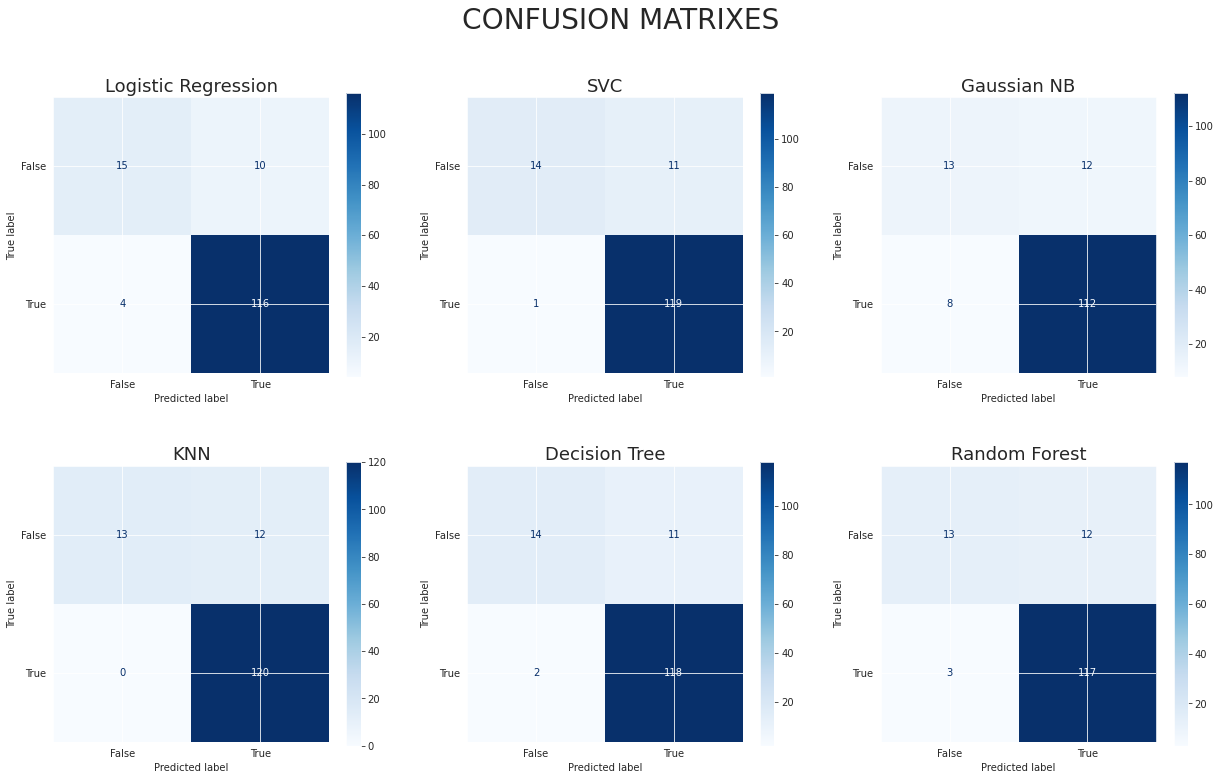

In [0]:
from sklearn.metrics import ConfusionMatrixDisplay

fig,axs=plt.subplots(2,3, figsize=(21, 12))
fig.suptitle("CONFUSION MATRIXES", fontsize=28)
plt.subplots_adjust(hspace=0.3)
for index, model in enumerate(ModelNames):
    cm = ConfusionMatrixDisplay(confusion_matrix=BestModels[model]["Confusion Matrix"], display_labels=[False, True])
    cm.plot(ax=axs[index//3, index%3], cmap="Blues")
    axs[index//3, index%3].set_title(model, fontsize=18)

plt.show()

<h3>
<p>Roc Curves of The Best Models
</h3>

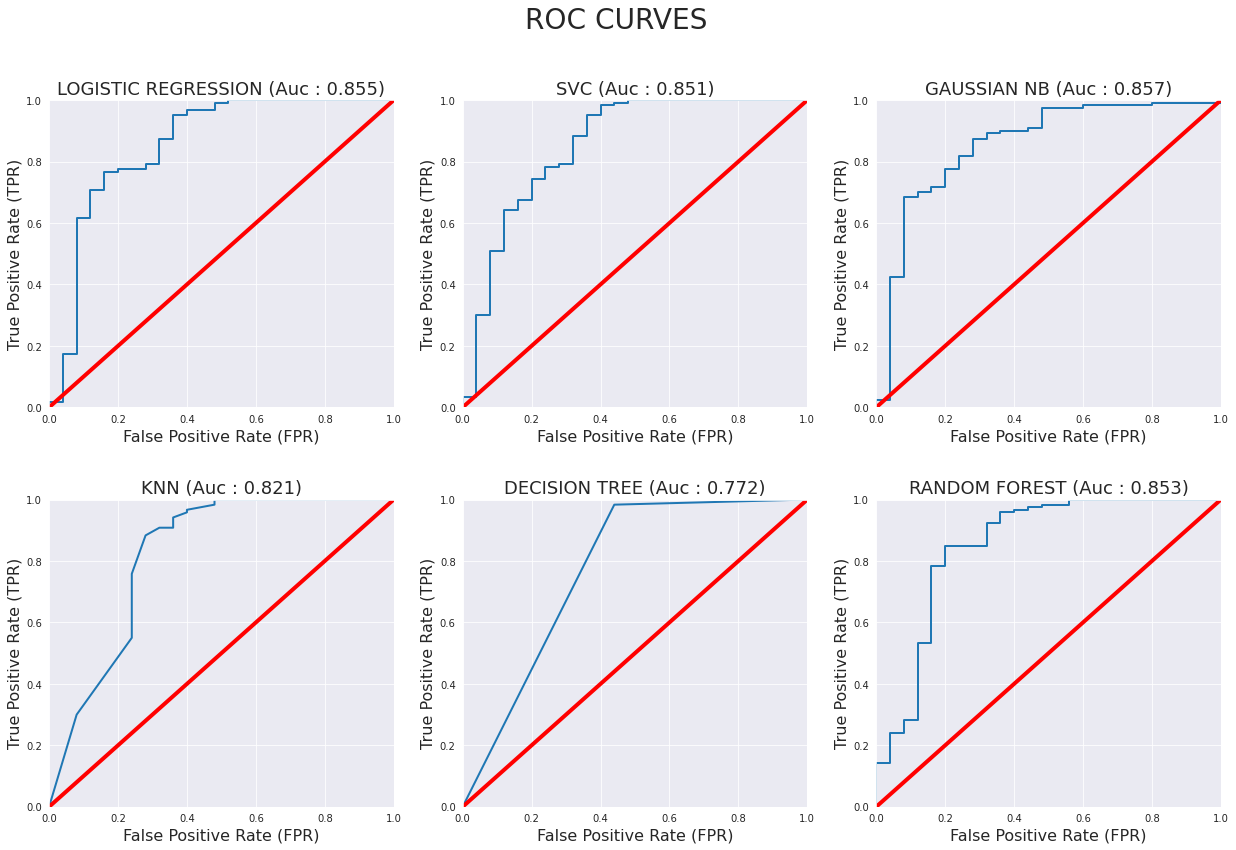

In [0]:
from sklearn.metrics import roc_curve, auc

fig,axs=plt.subplots(2,3, figsize=(21, 13))
fig.suptitle("ROC CURVES", fontsize=28)
plt.subplots_adjust(hspace=0.3)

for index, model in enumerate(ModelNames):
    auc_score, false_positive_rate, true_positive_rate = BestModels[model]['Auc Value'], BestModels[model]['False Positive Rate'], BestModels[model]['True Positive Rate'] 
    
    axs[index // 3, index % 3].plot(false_positive_rate, true_positive_rate, linewidth=2, label='label')
    axs[index // 3, index % 3].plot([0, 1], [0, 1], 'r', linewidth=4)
    axs[index // 3, index % 3].axis([0, 1, 0, 1])
    axs[index // 3, index % 3].set_xlabel('False Positive Rate (FPR)', fontsize=16)
    axs[index // 3, index % 3].set_ylabel('True Positive Rate (TPR)', fontsize=16)
    axs[index // 3, index % 3].set_title(model.upper()+" (Auc : "+str(round(auc_score,3))+")", fontsize=18)

plt.show()


In [0]:
def BarChartForScores(score, y_label):
    fig = plt.figure(figsize=(8,5))
    sns.set_style('darkgrid')
    colors = [sns.color_palette()[i] for i in [0,-1,4,1,-2,2]]
    s = sns.barplot(x=ModelNames, y=[round(BestModels[model][score]*100, 2) for model in ModelNames], alpha=.8, palette=colors)
    for i in s.containers:
        s.bar_label(i,)
    plt.xlabel("ML ALGORITHMS", fontsize=13)
    plt.ylabel(y_label, fontsize=15)
    plt.show()

<h3>
<p>Accuracy Percentages of The Best Models
</h3>

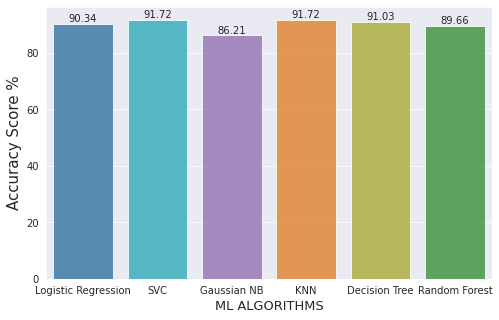

In [0]:
BarChartForScores("Accuracy", "Accuracy Score %")

<h3>
<p>F1-Score Percentages of The Best Models
</h3>

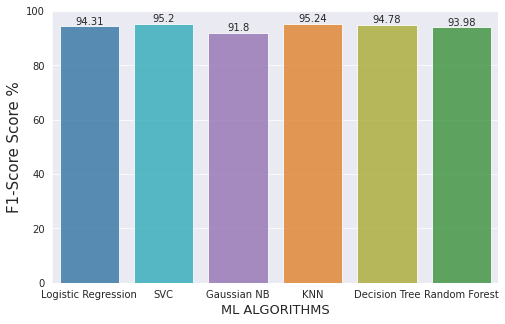

In [0]:
BarChartForScores("F1-Score", "F1-Score Score %")

<h3>
<p>Precision Percentages of The Best Models
</h3>

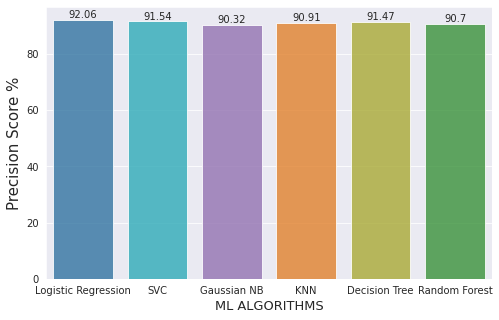

In [0]:
BarChartForScores("Precision", "Precision Score %")

<h3>
<p>Recall Percentages of The Best Models
</h3>

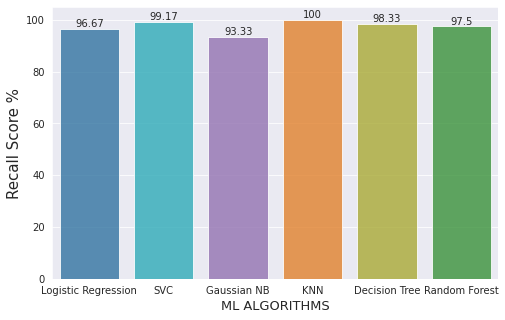

In [0]:
BarChartForScores("Recall", "Recall Score %")

<h3>
<p>Diff Train-Test F1 Percentages of The Best Models
</h3>

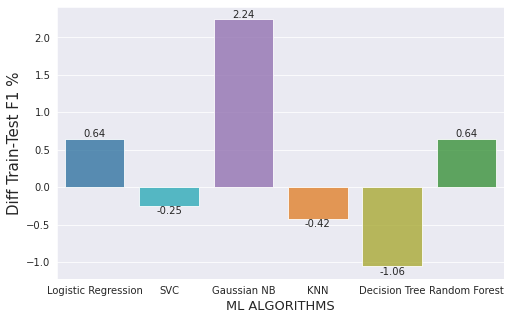

In [0]:
BarChartForScores("Diff Train-Test F1", "Diff Train-Test F1 %")

<h3>
<p>BEST MODEL SCORES
</h3>

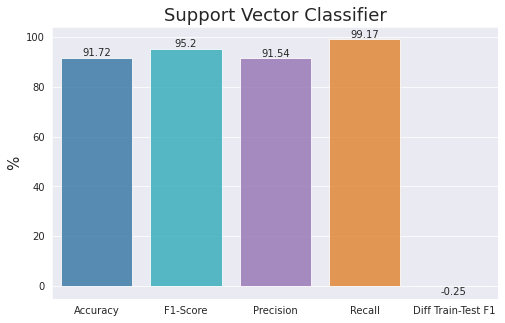

In [0]:
scores=['Accuracy', 'F1-Score', 'Precision', 'Recall', "Diff Train-Test F1"]

fig = plt.figure(figsize=(8 ,5))
sns.set_style('darkgrid')
colors = [sns.color_palette()[i] for i in [0 ,-1 ,4 ,1 ,-2 ,2]]
s = sns.barplot(x=scores, y=[round(BestModels["SVC"][score] *100, 2) for score in scores], alpha=.8, palette=colors)
for i in s.containers:
    s.bar_label(i ,)
plt.ylabel("%", fontsize=15)
plt.title("Support Vector Classifier", fontsize=18)
plt.show()

<h3>
<p>PREDICTIONS FOR ENROLLED STUDENTS
</h3>

In [0]:
scaledX_Test = BestModels["SVC"]["Scaler Object"].transform(EnrolledStudents.iloc[:,:-3])
pcadX_Test = BestModels["SVC"]["PCA"].transform(scaledX_Test)  
grid_search = BestModels["SVC"]["Grid_Search"]
Preds_For_Enrolled_Students = grid_search.best_estimator_.predict(pcadX_Test)

Enrolled = pd.DataFrame({'Predictions': Preds_For_Enrolled_Students})
Enrolled['Predictions'] = Enrolled['Predictions'].map({0: 'Dropout', 1: 'Graduate'})

fig = px.pie(Enrolled.groupby('Predictions').size().reset_index(name='Count'), values="Count", names='Predictions', width=420, height=420, color_discrete_sequence=px.colors.sequential.Plasma[::3])
fig.show()